## 1.7.1 Camera Calibration

In [13]:
import cv2
import numpy as np
import glob
from matplotlib import pyplot as plt
# termination criteria
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 30, 0.001)
# prepare object points, like (0,0,0), (1,0,0), (2,0,0) ....,(6,5,0)
objp = np.zeros((6*7,3), np.float32)
objp[:,:2] = np.mgrid[0:7,0:6].T.reshape(-1,2)
# Arrays to store object points and image points from all the images.
objpoints = [] # 3d point in real world space
imgpoints = [] # 2d points in image plane.
images = glob.glob('holdimage.png')
# images = glob.glob(resource_path + './images2/*.jpg')
len(images)

1

In [14]:
for fname in images:
    img = cv2.imread(fname)
    gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    # Find the chess board corners
    ret, corners = cv2.findChessboardCorners(gray, (7,6),None)
    # If found, add object points, image points (after refining them)
    if ret == True:
        objpoints.append(objp)
        corners2 = cv2.cornerSubPix(gray,corners,(11,11),(-1,-1),criteria)
        imgpoints.append(corners2)
        # Draw and display the corners
        img = cv2.drawChessboardCorners(img, (7,6), corners2,ret)
        cv2.waitKey(0)
cv2.destroyAllWindows()
cv2.imshow('img',img)

## Calibration

In [ ]:
ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(objpoints, imgpoints, gray.shape[::-1],None,None)
mtx

In [16]:
dist

array([[ 0.02311786, -0.02676229, -0.00697039,  0.00419368,  0.01132867]])

In [17]:
print(rvecs)

[array([[-0.11769631],
       [ 0.00243971],
       [-0.03275907]])]


In [18]:
print(tvecs)

[array([[-3.97844153],
       [-0.52799082],
       [ 9.03509333]])]


## Undistortion

In [19]:
img = cv2.imread('holdimage.png')
h, w = img.shape[:2]
newcameramtx, roi=cv2.getOptimalNewCameraMatrix(mtx,dist,(w,h),1,(w,h))

## Using cv2.undistort()

In [20]:
# undistort
dst = cv2.undistort(img, mtx, dist, None, newcameramtx)
# crop the image
x,y,w,h = roi
dst = dst[y:y+h, x:x+w]
cv2.imwrite('holdimage.png',dst)

True

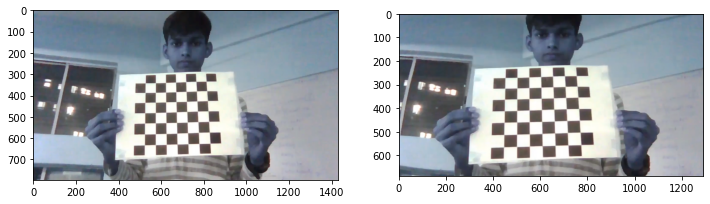

In [21]:
plt.figure(figsize=(12,8))
plt.subplot(121), plt.imshow(img)
plt.subplot(122), plt.imshow(dst)
plt.show()

In [22]:
# undistort
mapx,mapy = cv2.initUndistortRectifyMap(mtx,dist,None,newcameramtx,(w,h),5)
dst = cv2.remap(img,mapx,mapy,cv2.INTER_LINEAR)
# crop the image
x,y,w,h = roi
dst = dst[y:y+h, x:x+w]
cv2.imwrite('holdimage.png',dst)

True

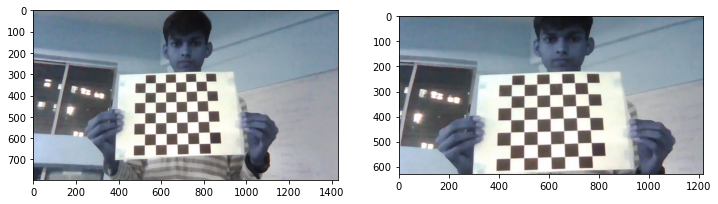

In [23]:
plt.figure(figsize=(12,8))
plt.subplot(121), plt.imshow(img)
plt.subplot(122), plt.imshow(dst)
plt.show()

In [24]:
tot_error = 0
for i in range(len(objpoints)):
    imgpoints2, _ = cv2.projectPoints(objpoints[i], rvecs[i], tvecs[i], mtx, dist)
    error = cv2.norm(imgpoints[i],imgpoints2, cv2.NORM_L2)/len(imgpoints2)
    tot_error += error
print("mean error: ", tot_error/len(objpoints))

mean error:  0.06701806495873482
